In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


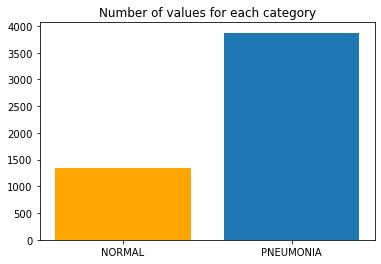

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


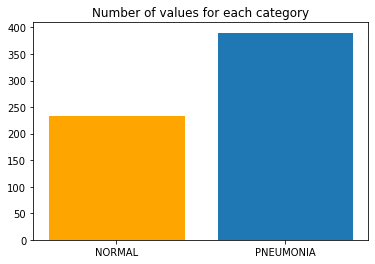

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


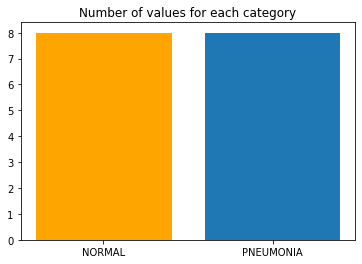

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), 
        batch_size=626)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(64, 64), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 64, 64, 3)
(5216, 2)
(624, 64, 64, 3)
(624, 2)


#### Let's reshape our data ####

In [12]:
X_train

array([[[[ 50.,  50.,  50.],
         [ 61.,  61.,  61.],
         [ 62.,  62.,  62.],
         ...,
         [ 52.,  52.,  52.],
         [ 44.,  44.,  44.],
         [  9.,   9.,   9.]],

        [[ 62.,  62.,  62.],
         [ 65.,  65.,  65.],
         [ 64.,  64.,  64.],
         ...,
         [ 55.,  55.,  55.],
         [ 45.,  45.,  45.],
         [ 33.,  33.,  33.]],

        [[ 67.,  67.,  67.],
         [ 72.,  72.,  72.],
         [ 74.,  74.,  74.],
         ...,
         [ 56.,  56.,  56.],
         [ 54.,  54.,  54.],
         [ 31.,  31.,  31.]],

        ...,

        [[ 24.,  24.,  24.],
         [ 17.,  17.,  17.],
         [ 49.,  49.,  49.],
         ...,
         [ 29.,  29.,  29.],
         [ 31.,  31.,  31.],
         [ 33.,  33.,  33.]],

        [[ 24.,  24.,  24.],
         [ 17.,  17.,  17.],
         [ 51.,  51.,  51.],
         ...,
         [ 28.,  28.,  28.],
         [ 31.,  31.,  31.],
         [ 31.,  31.,  31.]],

        [[ 24.,  24.,  24.],
       

In [32]:
X_train_unrow = X_train.reshape(5216, -1).T
X_train_unrow.shape

(12288, 5216)

In [14]:
X_train_unrow

array([[50., 50., 50., ..., 32., 32., 32.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [25., 25., 25., ...,  0.,  0.,  0.],
       [27., 27., 27., ..., 27., 27., 27.],
       [72., 72., 72., ..., 13., 13., 13.]], dtype=float32)

In [15]:
X_test

array([[[[ 33.,  33.,  33.],
         [176., 176., 176.],
         [161., 161., 161.],
         ...,
         [224., 224., 224.],
         [227., 227., 227.],
         [229., 229., 229.]],

        [[187., 187., 187.],
         [ 33.,  33.,  33.],
         [ 42.,  42.,  42.],
         ...,
         [221., 221., 221.],
         [226., 226., 226.],
         [228., 228., 228.]],

        [[ 34.,  34.,  34.],
         [ 41.,  41.,  41.],
         [ 41.,  41.,  41.],
         ...,
         [221., 221., 221.],
         [226., 226., 226.],
         [229., 229., 229.]],

        ...,

        [[ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         [ 24.,  24.,  24.],
         ...,
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.]],

        [[ 28.,  28.,  28.],
         [ 27.,  27.,  27.],
         [ 24.,  24.,  24.],
         ...,
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.],
         [ 26.,  26.,  26.]],

        [[ 27.,  27.,  27.],
       

In [33]:
X_test_unrow = X_test.reshape(624, -1).T
X_test_unrow.shape

(12288, 624)

In [17]:
#X_test_unrow

In [18]:
#Taking a look at our y_train data
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [19]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [20]:
y_train_final = y_train.T[[1]]
#y_train_final[:20]

In [21]:
y_train_final.shape

(1, 5216)

In [22]:
#Let's take a look at our y_test data
#y_test

In [23]:
y_test_final = y_test.T[[1]]
#y_test_final[:20]

In [24]:
y_test_final.shape

(1, 624)

#### Let's take a look at a pneumonia image vs a normal image ####

In [25]:
#plt.imshow(X_train_unrow[0])
#plt.axis('off')
#plt.title('Normal X-Ray')
#plt.show()

In [26]:
#Lastly let's normalize our data
X_train_final = X_train_unrow / 255
X_test_final = X_test_unrow / 255


In [34]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)
print(X_val.shape)
print(y_val.shape)

(5216, 12288)
(624, 12288)
(1, 5216)
(1, 624)
(16, 64, 64, 3)
(16, 2)


### Building Our Model ###

In [28]:
model_1 = Sequential()
model_1.add(Dense(50, activation = 'tanh', input_shape = (12288,)))
model_1.add(Dense(25, activation = 'softmax'))

In [29]:
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                614450    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
Total params: 615,725
Trainable params: 615,725
Non-trainable params: 0
_________________________________________________________________


In [35]:
results_1 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_val, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 5216
  y sizes: 1
Please provide data which shares the same first dimension.